核磁谱绘制

# 导入依赖库

In [1]:
import os

import warnings
warnings.filterwarnings('ignore')
# 加入上述两条屏蔽警告信息，调试的时候应该去掉这两行

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
import matplotlib as mpl


from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

plt.rcParams['axes.unicode_minus'] = False
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable


# 设置数据路径

In [2]:
# 项目路径
project_dir = os.getcwd()
data_dir = "data"
fig_dir_path = "figure"

In [3]:
'''
plot_line = True
show_sw = True
'''
plot_line = True



file_t1 = os.path.join(project_dir,data_dir,'T1_point1_01.txt')
file_t2 = os.path.join(project_dir, data_dir,'T2_point1_01.txt')
file_fvol =  os.path.join(project_dir,data_dir,'T1T2_point_01.txt')
file_t1_spectrum = os.path.join(project_dir, data_dir,'T1_spectrum_01.txt')
file_t2_spectrum = os.path.join(project_dir, data_dir,'T2_spectrum_01.txt')


t1_domain = np.loadtxt(file_t1) # 1d minimum points
t2_domain = np.loadtxt(file_t2) # 1d minimum points
t1_spectrum = np.loadtxt(file_t1_spectrum) # 1d minimum points
t2_spectrum = np.loadtxt(file_t2_spectrum) # 1d minimum points
f_grid = np.loadtxt(file_fvol)
print("after loadtxt")


after loadtxt


# 绘图参考
https://zhajiman.github.io/post/matplotlib_colorbar/

In [4]:
# https://zhajiman.github.io/post/matplotlib_colorbar/
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms

def add_box(ax):
    '''用红框标出一个ax的范围.'''
    axpos = ax.get_position()
    rect = mpatches.Rectangle(
        (axpos.x0, axpos.y0), axpos.width, axpos.height,
        lw=3, ls='--', ec='r', fc='none', alpha=0.5,
        transform=ax.figure.transFigure
    )
    ax.patches.append(rect)

def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距,width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mtransforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax

# 绘制T1T2原始二维谱

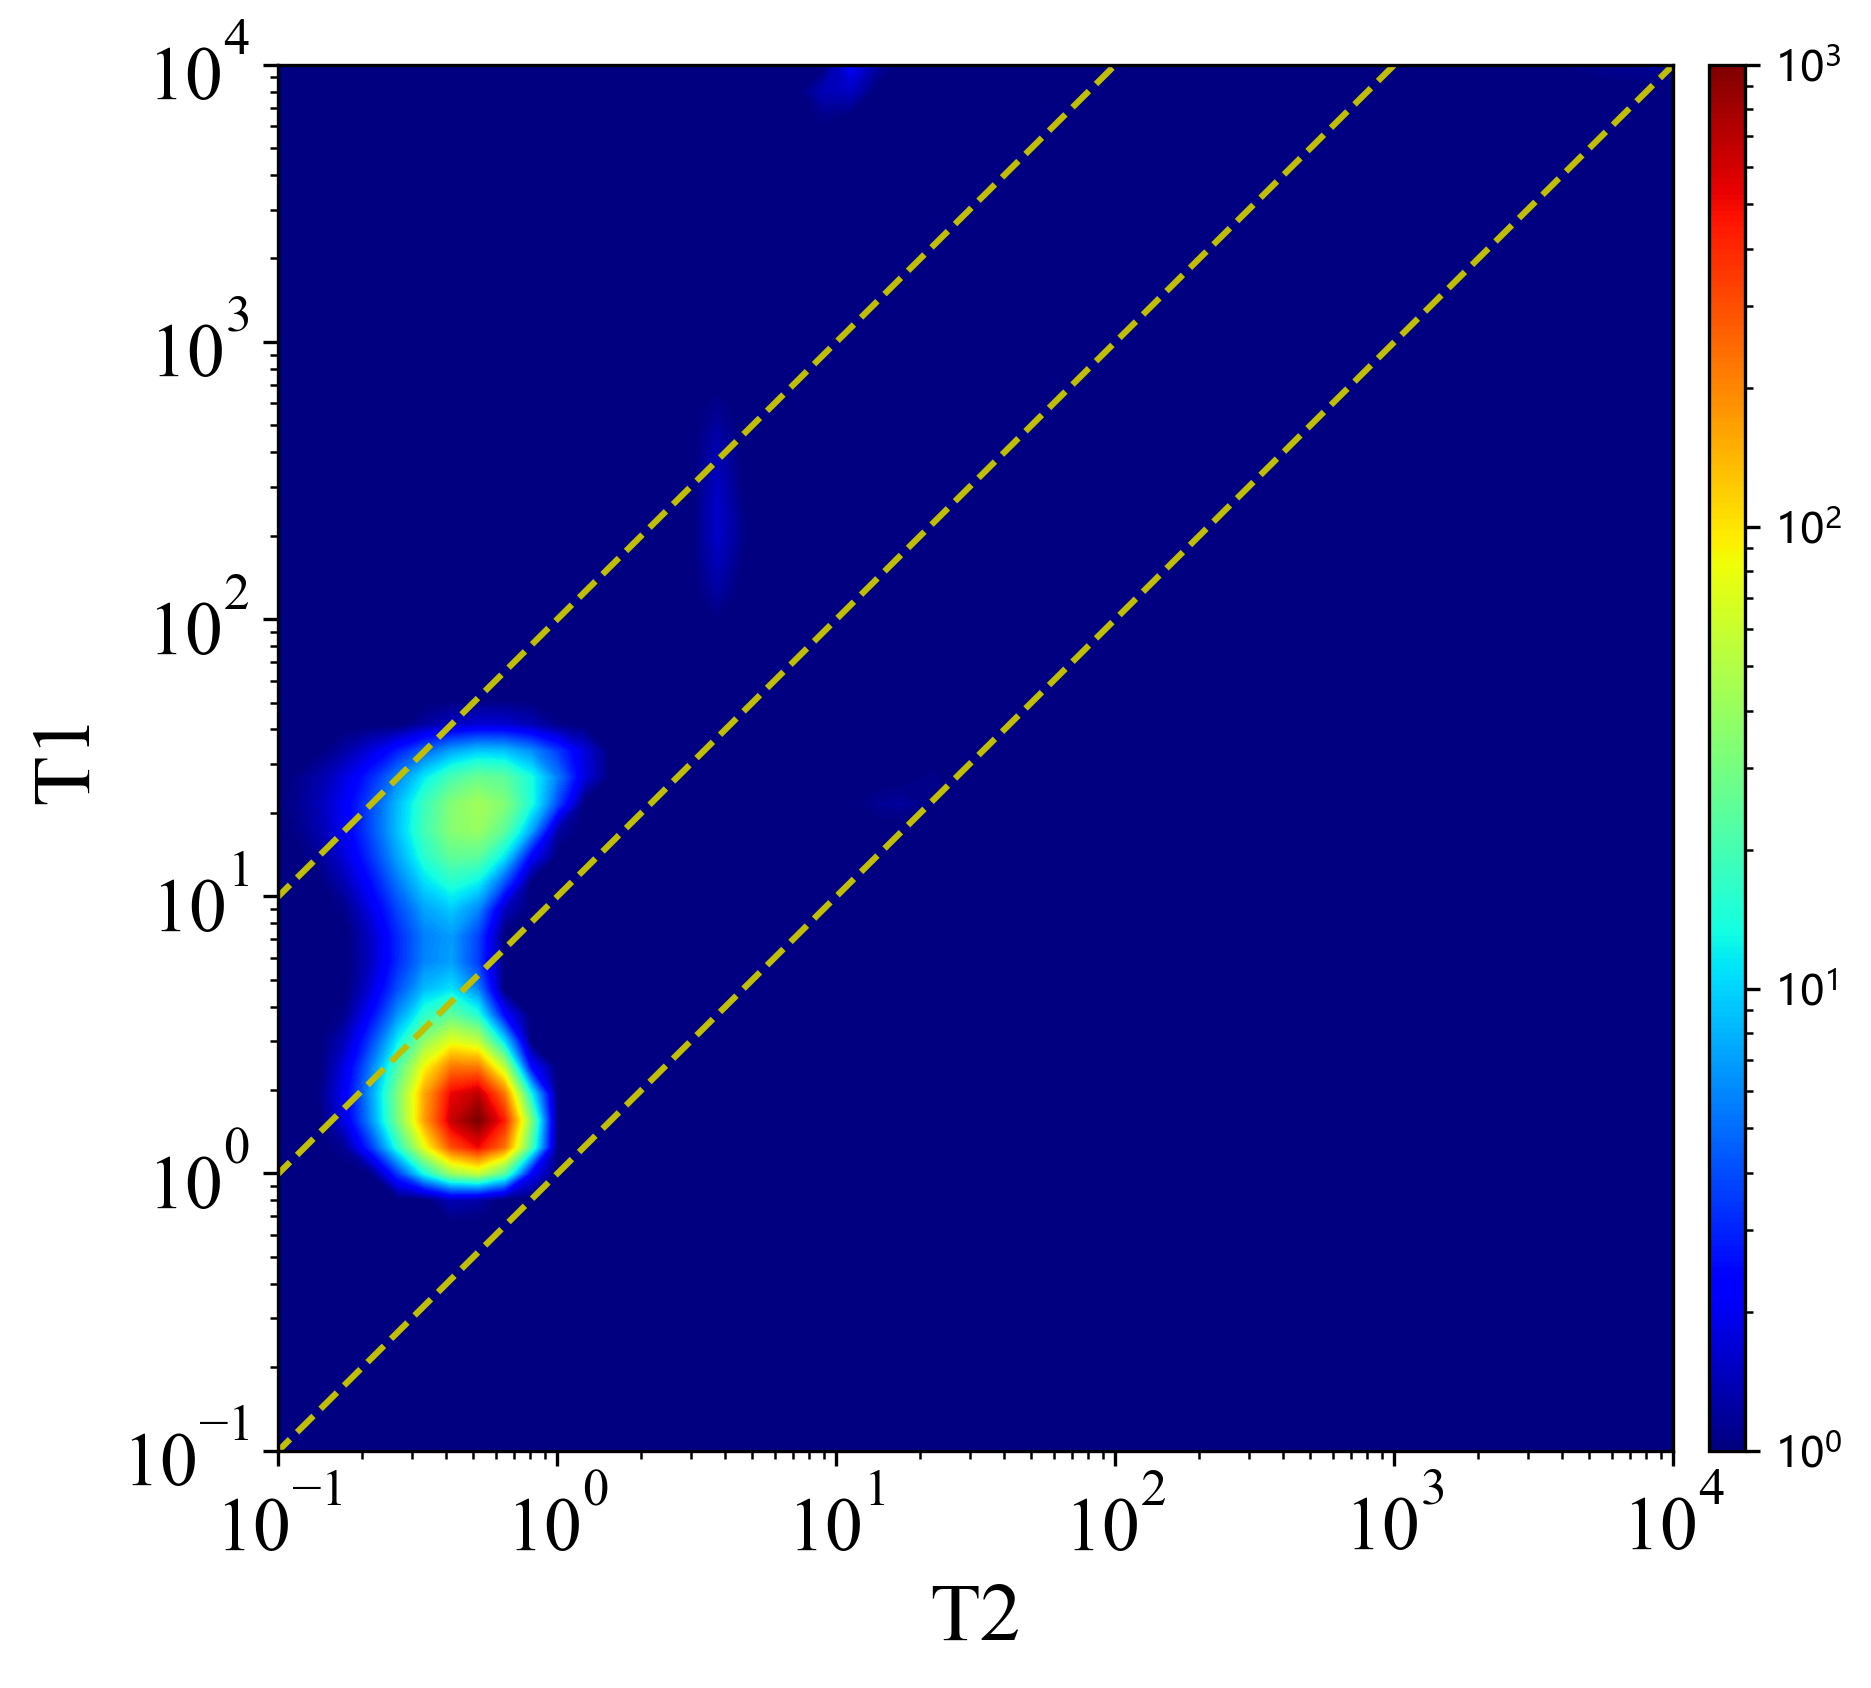

In [5]:

fig,ax =  plt.subplots(nrows=1,ncols=1,figsize=(6, 6),dpi=300)
# fig = plt.figure(figsize=(8, 8))
plt.xticks(fontproperties = 'Times New Roman', size = 18)
plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.ylabel('T1', fontdict={'family' : 'Times New Roman', 'size'   : 20})
plt.xlabel('T2', fontdict={'family' : 'Times New Roman', 'size'   : 20})
#plt.contourf(np.log10(t2_domain), np.log10(t1_domain), nmr_cluster.f_grid,cmap=plt.get_cmap('RdBu_r'), extend='both',levels=200)    # 显示图表
# plt.contourf(np.log10(t2_domain), np.log10(t1_domain), f_grid,cmap=plt.get_cmap('jet'), extend='both',levels=200)    # 显示图表
plt.contourf(t2_domain, t1_domain, f_grid,cmap=plt.get_cmap('jet'), extend='both',levels=200)    # 显示图表


# 以10为底的对数，只显示正数
log_axi_array = [0.01,0.1,1,10,100,1000,10000,100000]
plt.semilogx(base=10,subs=log_axi_array,nonpositive='mask')
plt.semilogy(base=10,subs=log_axi_array,nonpositive='mask')

#   绘制三条斜线
if plot_line:
    # plt.loglog([np.log10(0.3),np.log10(3000)],[np.log10(0.3),np.log10(3000)],'k--',color='y')
    # plt.loglog([np.log10(0.3),np.log10(3000)-1],[1+np.log10(0.3),np.log10(3000)],'k--',color='y')
    # plt.loglog([np.log10(0.3),np.log10(3000)-2],[2+np.log10(0.3),np.log10(3000)],'k--',color='y')
    # 不取对数的值
    plt.loglog([0.03,30000],[0.03,30000],'k--',color='y')
    plt.loglog([0.03,30000/10],[0.3,30000],'k--',color='y')
    plt.loglog([0.03,30000/100],[3,30000],'k--',color='y')

# 设置横纵坐标轴范围
plt.xlim(0.1,10000)
plt.ylim(0.1,10000)

# ax = plt.axes()
cax = add_right_cax(ax, pad=0.02, width=0.02)
# cbar = axes[0, 1].colorbar(axes[0, 1], cax=cax)
cmp = plt.get_cmap('jet')
#
# # https://zhajiman.github.io/post/matplotlib_colorbar/
#
norm = mcolors.LogNorm(vmin=1E0, vmax=1E3)
# # norm = mpl.colors.BoundaryNorm([0,1,2,3], cmp.N)
# # create an Axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.

# ax.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), ax=cax,location='right')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), cax=cax)


plt.savefig(os.path.join(project_dir,fig_dir_path, 'T1T2map.png'), bbox_inches='tight')
plt.show()

# 绘制T1、T2联合分布图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


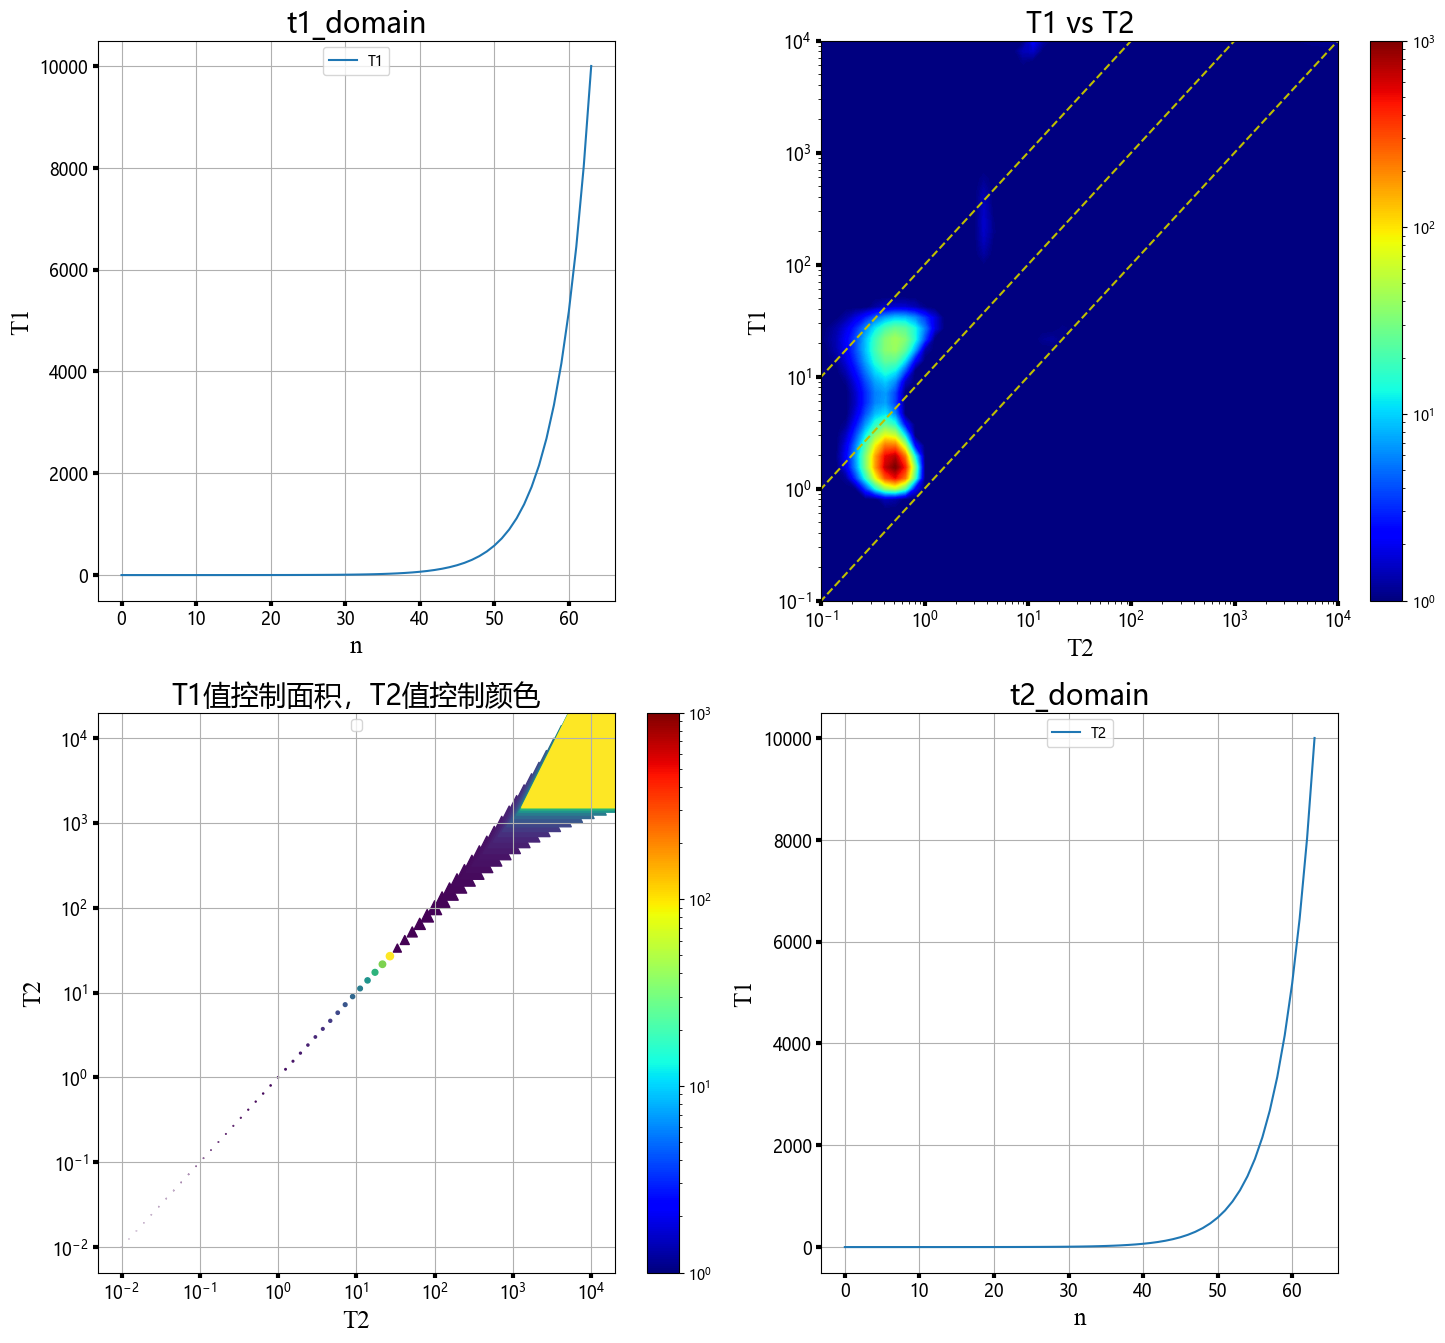

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
'''控制两列间隔'''
fig.subplots_adjust(hspace=0.2, wspace=0.4)


# 绘制第1个图
t1_x = range(len(t1_domain))
im1 = axes[0, 0].plot(t1_x,t1_domain,label='T1')
axes[0, 0].set_title('t1_domain',fontsize = 20)
axes[0, 0].set_ylabel('T1', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[0, 0].set_xlabel('n', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[0, 0].tick_params(labelcolor='black', labelsize='large', width=3)
axes[0, 0].grid()
axes[0, 0].legend(loc='upper center')

'''绘制第3个图'''
# 显示T1-T2图表
axes[0, 1].contourf(t2_domain, t1_domain, f_grid,cmap=plt.get_cmap('jet'), extend='both',levels=200)    # 显示图表

# 以10为底的对数，只显示正数
log_axi_array = [0.01,0.1,1,10,100,1000,10000,100000]
axes[0, 1].semilogx(base=10,subs=log_axi_array,nonpositive='mask')
axes[0, 1].semilogy(base=10,subs=log_axi_array,nonpositive='mask')

'''绘制三条斜线'''
if plot_line:
    # plt.loglog([np.log10(0.3),np.log10(3000)],[np.log10(0.3),np.log10(3000)],'k--',color='y')
    # plt.loglog([np.log10(0.3),np.log10(3000)-1],[1+np.log10(0.3),np.log10(3000)],'k--',color='y')
    # plt.loglog([np.log10(0.3),np.log10(3000)-2],[2+np.log10(0.3),np.log10(3000)],'k--',color='y')
    # 不取对数的值
    axes[0, 1].loglog([0.03,30000],[0.03,30000],'k--',color='y')
    axes[0, 1].loglog([0.03,30000/10],[0.3,30000],'k--',color='y')
    axes[0, 1].loglog([0.03,30000/100],[3,30000],'k--',color='y')

'''设置横纵坐标轴范围'''
axes[0, 1].set_xlim(0.1,10000)
axes[0, 1].set_ylim(0.1,10000)
axes[0, 1].set_ylabel('T1', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[0, 1].set_xlabel('T2', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[0, 1].tick_params(labelcolor='black', labelsize='large', width=3)
axes[0, 1].set_title('T1 vs T2',fontsize = 20)

cax = add_right_cax(axes[0, 1], pad=0.02, width=0.02)
# cbar = axes[0, 1].colorbar(axes[0, 1], cax=cax)
# # ax= plt.axes()
cmp = plt.get_cmap('jet')
#
# # https://zhajiman.github.io/post/matplotlib_colorbar/
#
norm = mcolors.LogNorm(vmin=1E0, vmax=1E3)
# # norm = mpl.colors.BoundaryNorm([0,1,2,3], cmp.N)
# # create an Axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.

# ax.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), ax=cax,location='right')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), cax=cax)

t2_x = range(len(t2_domain))
'''绘制第3个图T1 vs T2'''
'''https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html'''
'''https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_masked.html#sphx-glr-gallery-lines-bars-and-markers-scatter-masked-py'''
# 散点图
# T2截止值
T2_threshold = 33
area1 = np.ma.masked_where(t2_domain < T2_threshold, t1_domain)
area2 = np.ma.masked_where(t2_domain >= T2_threshold, t1_domain)
# T1值控制面积，T2值控制颜色
im31 = axes[1, 0].scatter(t2_domain,t2_domain, s=area1, marker='^', c=t2_domain)
im32 = axes[1, 0].scatter(t2_domain,t2_domain, s=area2, marker='o', c=t2_domain)
# im3 = axes[1, 0].scatter(t1_domain,t2_domain,marker=None, cmap=cmp,label='T1 vs T2')

# im3 = axes[1, 0].hist2d(t1_domain,t2_domain,bins=100, cmap=cmp,label='T1 vs T2')
axes[1, 0].semilogx(base=10,subs=log_axi_array,nonpositive='mask')
axes[1, 0].semilogy(base=10,subs=log_axi_array,nonpositive='mask')
axes[1, 0].set_title('T1值控制面积，T2值控制颜色',fontsize = 20)
axes[1, 0].set_ylabel('T2', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[1, 0].set_xlabel('T2', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[1, 0].tick_params(labelcolor='black', labelsize='large', width=3)
axes[1, 0].grid()
axes[1, 0].legend(loc='upper center')
cax2 = add_right_cax(axes[1, 0], pad=0.02, width=0.02)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), cax=cax2)

'''绘制第4个图'''

im4 = axes[1, 1].plot(t2_x,t2_domain,label='T2')
axes[1, 1].set_title('t2_domain',fontsize = 20)
axes[1, 1].set_ylabel('T1', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[1, 1].set_xlabel('n', fontdict={'family' : 'Times New Roman', 'size'   : 18})
axes[1, 1].tick_params(labelcolor='black', labelsize='large', width=3)
axes[1, 1].grid()
axes[1, 1].legend(loc='upper center')




plt.savefig(os.path.join(project_dir,fig_dir_path, 'all_T1T2map.png'), bbox_inches='tight')
plt.show()

# 其他例子

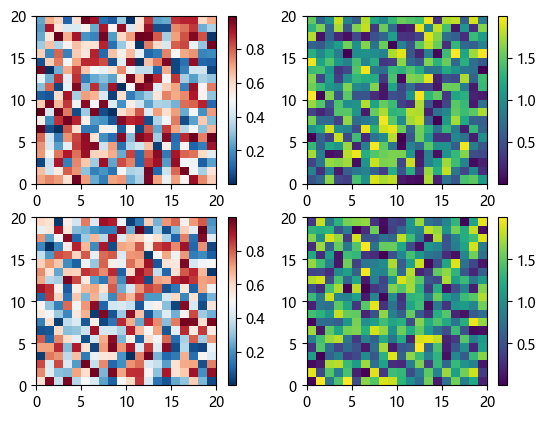

In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

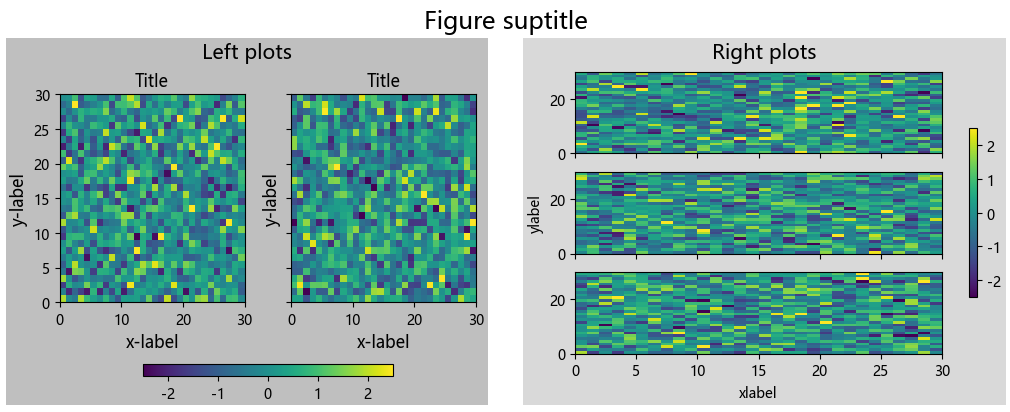

In [8]:
def example_plot(ax, fontsize=12, hide_labels=False):
    pc = ax.pcolormesh(np.random.randn(30, 30), vmin=-2.5, vmax=2.5)
    if not hide_labels:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    return pc

np.random.seed(19680808)
# gridspec inside gridspec
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')
for ax in axsLeft:
    pc = example_plot(ax)
subfigs[0].suptitle('Left plots', fontsize='x-large')
subfigs[0].colorbar(pc, shrink=0.6, ax=axsLeft, location='bottom')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    pc = example_plot(ax, hide_labels=True)
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].colorbar(pc, shrink=0.6, ax=axsRight)
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

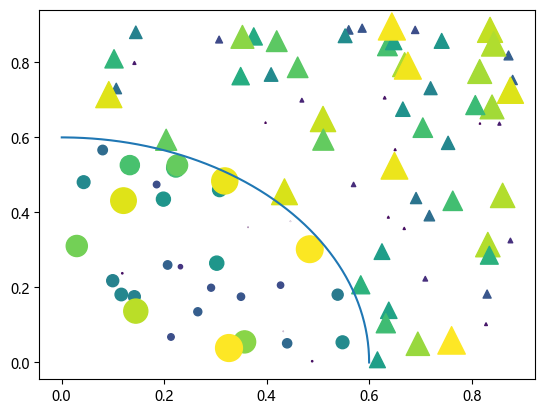

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

In [10]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def scatter_hist(x, y, z, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    # 显示T1-T2图表
    ax.contourf(y, x, z,cmap=plt.get_cmap('jet'), extend='both',levels=200)    # 显示图表

    # 以10为底的对数，只显示正数
    log_axi_array = [0.001,0.01,0.1,1,10,100,1000,10000,100000]
    ax.semilogx(base=10,subs=log_axi_array,nonpositive='mask')
    ax.semilogy(base=10,subs=log_axi_array,nonpositive='mask')

    '''绘制三条斜线'''
    if plot_line:
        # ax.loglog([np.log10(0.3),np.log10(30000)],[np.log10(0.3),np.log10(30000)],'k--',color='y')
        # ax.loglog([np.log10(0.3),np.log10(30000)-1],[1+np.log10(0.3),np.log10(30000)],'k--',color='y')
        # ax.loglog([np.log10(0.3),np.log10(30000)-2],[2+np.log10(0.3),np.log10(30000)],'k--',color='y')
        # 不取对数的值
        ax.loglog([0.003,30000],[0.003,30000],'k--',color='y')
        ax.loglog([0.003,30000/10],[0.03,30000],'k--',color='y')
        ax.loglog([0.003,30000/100],[0.3,30000],'k--',color='y')
        # ax.loglog([0.03,30000/100],[3,30000],'k--',color='y')
        # ax.loglog([0.003,30000/1000],[3,30000],'k--',color='y')

    '''设置横纵坐标轴范围'''
    ax.set_xlim(0.01,10000)
    ax.set_ylim(0.01,10000)
    ax.set_ylabel('T1(s)', fontdict={'family' : 'Times New Roman', 'size'   : 18})
    ax.set_xlabel('T2(s)', fontdict={'family' : 'Times New Roman', 'size'   : 18})
    ax.tick_params(labelcolor='black', labelsize='large', width=3)
    ax.set_title('T1 vs T2',fontsize = 20)

    cax = add_right_cax(ax, pad=0.02, width=0.02)
    # cbar = axes[0, 1].colorbar(axes[0, 1], cax=cax)
    # # ax= plt.axes()
    cmp = plt.get_cmap('jet')
    #
    # # https://zhajiman.github.io/post/matplotlib_colorbar/
    #
    norm = mcolors.LogNorm(vmin=1E0, vmax=1E3)
    # # norm = mpl.colors.BoundaryNorm([0,1,2,3], cmp.N)
    # # create an Axes on the right side of ax. The width of cax will be 5%
    # # of ax and the padding between cax and ax will be fixed at 0.05 inch.

    # ax.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), ax=cax,location='right')
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmp), cax=cax)

    # 将矩阵的所有行叠加到第一行
    matrix_horzon = np.sum(z, axis=0)

    matrix_vertical = np.sum(z, axis=-1)
    ax_histx.plot(x,matrix_horzon)
    ax_histx.grid(axis='x',linestyle='-.')
    ax_histy.plot(matrix_vertical, y)
    ax_histy.grid(axis='y',linestyle='-.')
    plt.savefig(os.path.join(project_dir,fig_dir_path, 'T1T2map_hist.png'), bbox_inches='tight')
    plt.show()

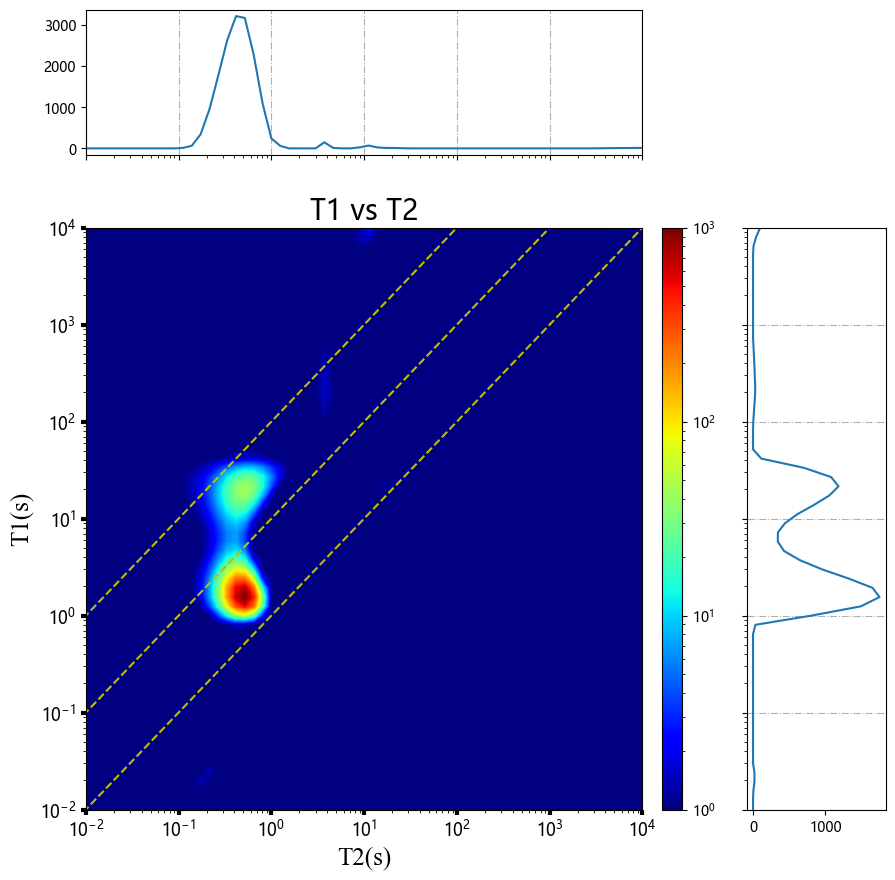

In [11]:
# Start with a square Figure.
fig = plt.figure(figsize=(10, 10))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.3, hspace=0.2)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(t1_domain, t2_domain,f_grid, ax, ax_histx, ax_histy)

In [12]:
fig.savefig(os.path.join(project_dir,fig_dir_path, 'T1T2map_hist_new.png'))

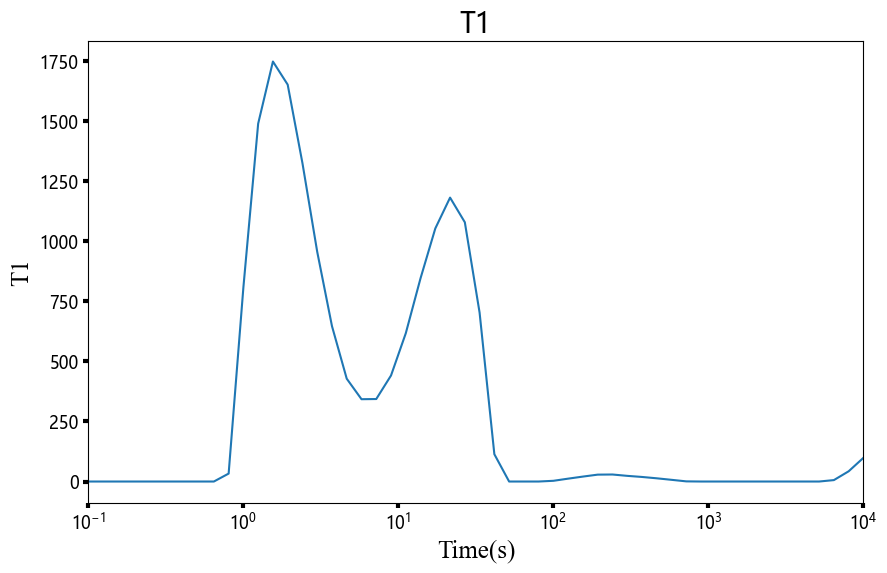

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t1_domain,t1_spectrum)
# 以10为底的对数，只显示正数
log_axi_array = [0.01,0.1,1,10,100,1000,10000,100000]
plt.semilogx(base=10,subs=log_axi_array,nonpositive='mask')
'''设置横纵坐标轴范围'''
plt.xlim(0.1,10000)
# plt.ylim(0.1,2000)
plt.ylabel('T1', fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.xlabel('Time(s)', fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.tick_params(labelcolor='black', labelsize='large', width=3)
plt.title('T1',fontsize = 20)
plt.show()

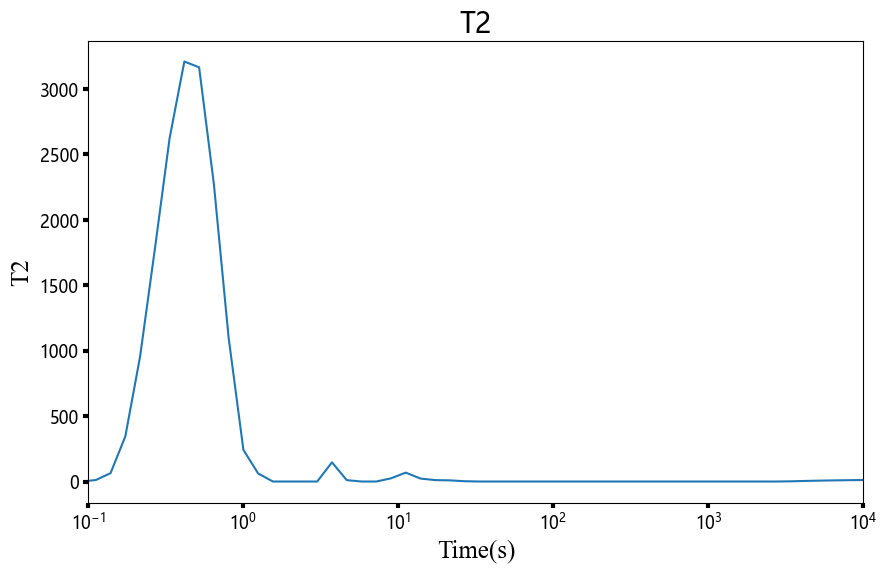

In [14]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t2_domain,t2_spectrum)
# 以10为底的对数，只显示正数
log_axi_array = [0.01,0.1,1,10,100,1000,10000,100000]
plt.semilogx(base=10,subs=log_axi_array,nonpositive='mask')
'''设置横纵坐标轴范围'''
plt.xlim(0.1,10000)
# plt.ylim(0.1,2000)
plt.ylabel('T2', fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.xlabel('Time(s)', fontdict={'family' : 'Times New Roman', 'size'   : 18})
plt.tick_params(labelcolor='black', labelsize='large', width=3)
plt.title('T2',fontsize = 20)
plt.show()

In [15]:
# 创建一个3x3的矩阵
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 将矩阵的所有行叠加到第一行
matrix2 = np.sum(matrix, axis=0)

matrix3 = np.sum(matrix, axis=1)
print(matrix2)
print(matrix3)

[12 15 18]
[ 6 15 24]


In [ ]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import skimage.io as skimageIO

In [ ]:


img = skimageIO.imread("figure/T1T2map.png", mode=None)

# 显示图片  
plt.imshow(img)  
plt.axis('off')  # 关闭刻度  
plt.show()

In [ ]:
# 将 RGBA 转换为 RGB  
if img.shape[2] == 4:  # 如果有 4 个通道  
    image_rgb = img[:, :, :3]  # 只保留 RGB 通道  
else:  
    image_rgb = img  # 若原本就是 RGB 则直接使用  

# 转换为灰度图  
image_gray = color.rgb2gray(image_rgb)  

# 显示灰度图像  
plt.imshow(image_gray, cmap='gray')  
plt.axis('off')  # 关闭刻度  
plt.show()  


# image = color.rgb2gray(data.astronaut())
image = image_gray

In [ ]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

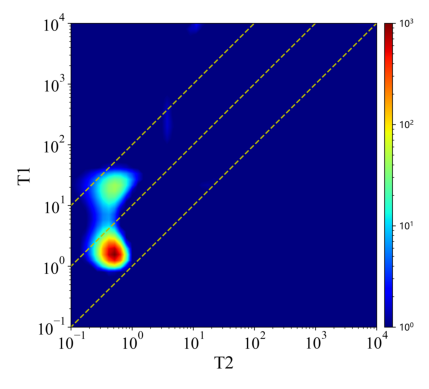

In [26]:


img = skimageIO.imread("figure/T1T2map.png", mode=None)

# 显示图片  
plt.imshow(img)  
plt.axis('off')  # 关闭刻度  
plt.show()

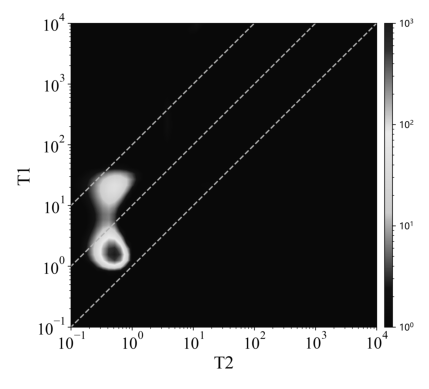

In [29]:
# 将 RGBA 转换为 RGB  
if img.shape[2] == 4:  # 如果有 4 个通道  
    image_rgb = img[:, :, :3]  # 只保留 RGB 通道  
else:  
    image_rgb = img  # 若原本就是 RGB 则直接使用  

# 转换为灰度图  
image_gray = color.rgb2gray(image_rgb)  

# 显示灰度图像  
plt.imshow(image_gray, cmap='gray')  
plt.axis('off')  # 关闭刻度  
plt.show()  


# image = color.rgb2gray(data.astronaut())
image = image_gray

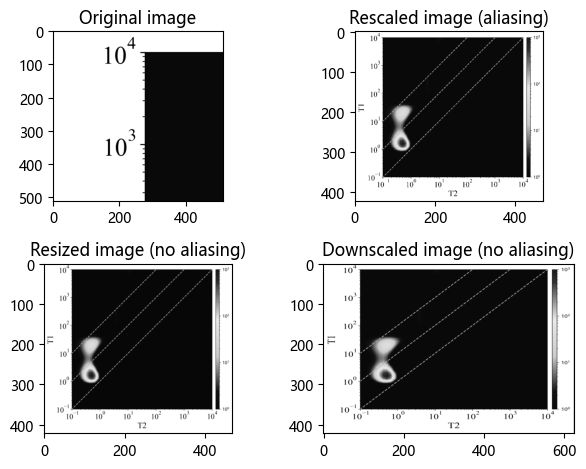

In [30]:
image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

# 参考

https://matplotlib.org/stable/gallery/index